# <center>Processamento Digital de Sinais </center>
## <center> Projeto 1 </center>
### <center>Departamento de Eletrônica e Sistemas </center>
#### <center>Prof. Ricardo Campello</center>

<center>David Riff de F. Tenório</center>
<center>Bianca Lisle Viana de Aguiar</center>

##### .

In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.style as style
plt.rcParams["figure.figsize"] = (16, 9)
style.use('ggplot')

import IPython.display as ipd

## Parte 1
Considere o sinal senoidal
$$x(t) = \sin(\Omega_{0} t)$$

Se $x(t)$ é amostrado com frequência $\Omega_s = \frac{2\pi}{T} = 2\pi(8192)$rad/seg, então o sinal de tempo discreto (sequência) obtido é 
$$x[n] = \sin\left(\frac{\Omega_{0}n}{8192}\right)$$

a) Considere $\Omega_{0} = 2\pi(1000)\text{rad/seg}$, e crie o vetor $n = [0 : 8191]$, de modo que $t = nT$ contenha os $8192$ instantes de amostragem do intervalo $0 \leq t < 1$. Crie um vetor x que contenha as amostras de $x(t)$ nos instantes de amostragem em $t$. 

In [12]:
Fs = 8192

n = np.array(range(Fs))
x = np.sin(2 * np.pi * 1000 * n/Fs)

b) Esboce as primeiras $50$ amostras de $x[n]$ em função de $n$ usando stem. Esboce as primeiras $50$ amostras de $x(t)$ em função dos instantes de amostragem usando plot. Use subplot para exibir simultaneamente os dois gráficos.

Note que, dada as amostras em $x$, plot(t, x) esboça um sinal de tempo contínuo usando linhas retas para interpolar entre os valores das amostras. Embora esta interpolação não seja igual à reconstrução de banda limitada decorrente do teorema da amostragem, ela pode ser uma boa aproximação.

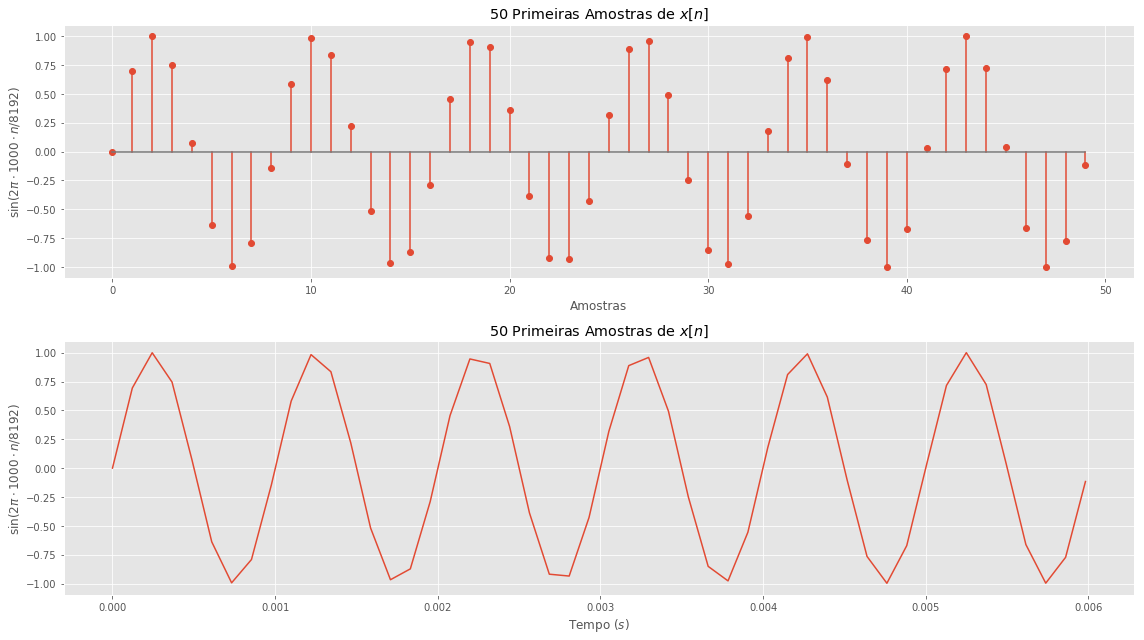

In [13]:
t = n / Fs

plt.subplot(211)
plt.xlabel('Amostras')
plt.ylabel('$\sin(2 \pi \cdot 1000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.stem(n[:50], x[:50])

plt.subplot(212)
plt.xlabel('Tempo ($s$)')
plt.ylabel('$\sin(2 \pi \cdot 1000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.plot(t[:50], x[:50])

plt.tight_layout()
plt.show()

c) Coloque o arquivo MATLAB (M-file) ctfs.m no seu MATHLABPATH. Use $[X, \omega] = \text{ctfs}(x, T)$ para calcular a transformada de Fourier de tempo contínuo do sinal reconstruido $x_r(t)$. Esboce a magnitude de $X$ versus $\omega$. $X$ é diferente de zero nos valores de frequência esperados? (Note que quase todos os elementos em X são não nulos, mas a maioria deles são valores pequenos devido a erros de arredondamento).

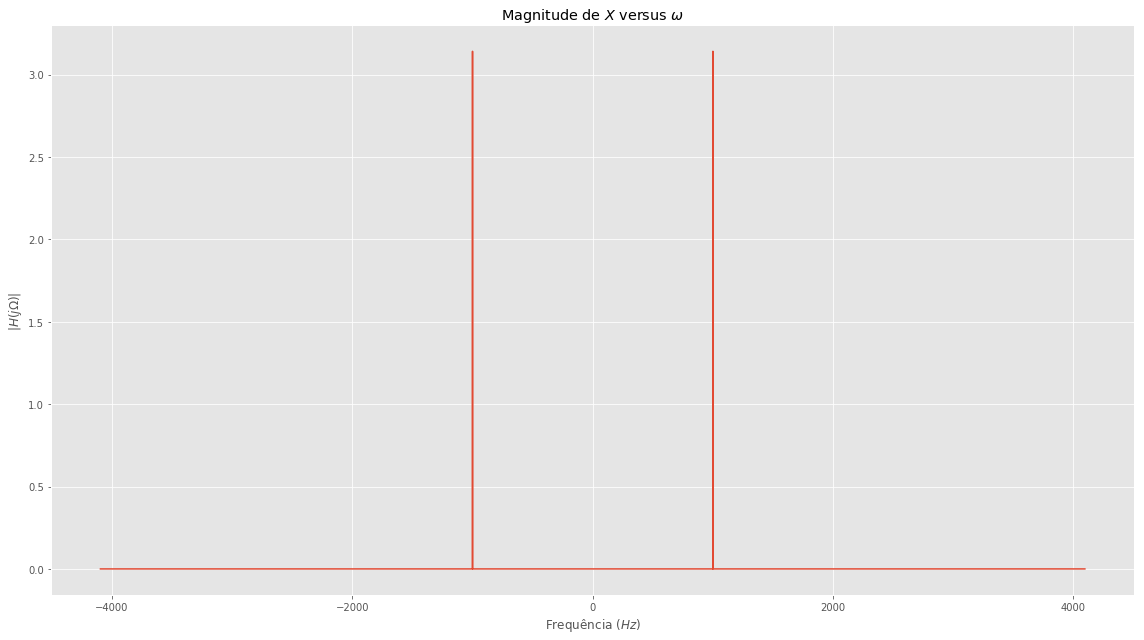

In [14]:
def ctfts(x: np.ndarray, T: float) -> (np.ndarray, np.ndarray):
    N = len(x)
    X = np.fft.fftshift(np.fft.fft(x, N)) * (2 * np.pi/N)
    w = np.linspace(-1, 1 - 1/N, N) / (2*T)
    return np.array(X, dtype=complex), w

X, w = ctfts(x, 1/Fs)
plt.title('Magnitude de $X$ versus $\omega$')
plt.ylabel('$|H(j\Omega)|$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w, np.abs(X))
plt.tight_layout()
plt.show()

<span style="color:green"> Sim, pois a $\mathcal{F}\left \{ \sin \left(\Omega_{o} n\right) \right \} = j \pi \sum_{k=-\infty}^{\infty}\left[\delta\left(\Omega+\Omega_{o}-2 \pi k\right)-\delta\left(\Omega-\Omega_{o}-2 \pi k\right)\right]$. Espera-se, então dois impulsos na frequência $f = 1000 \text{Hz} $ que é exatamente o que é visto no gráfico.</span>

## Parte 2: Problemas Intermediários
d) Repita as partes (a)-(c) para as frequências $\Omega_{0} = 2\pi(1500)$ e $\Omega_{0} = 2\pi(2000) \text{rad/seg}$. A magnitude de X é diferente de zero nas frequências esperadas? A fase de X está correta?

<span style="color:green"> As colunas abaixo mostram os gráficos para as frequências x1 e x2 com as frequências $\Omega_1 = 2\pi (1500)$ e $\Omega_2 = 2\pi(2000)$.</span>

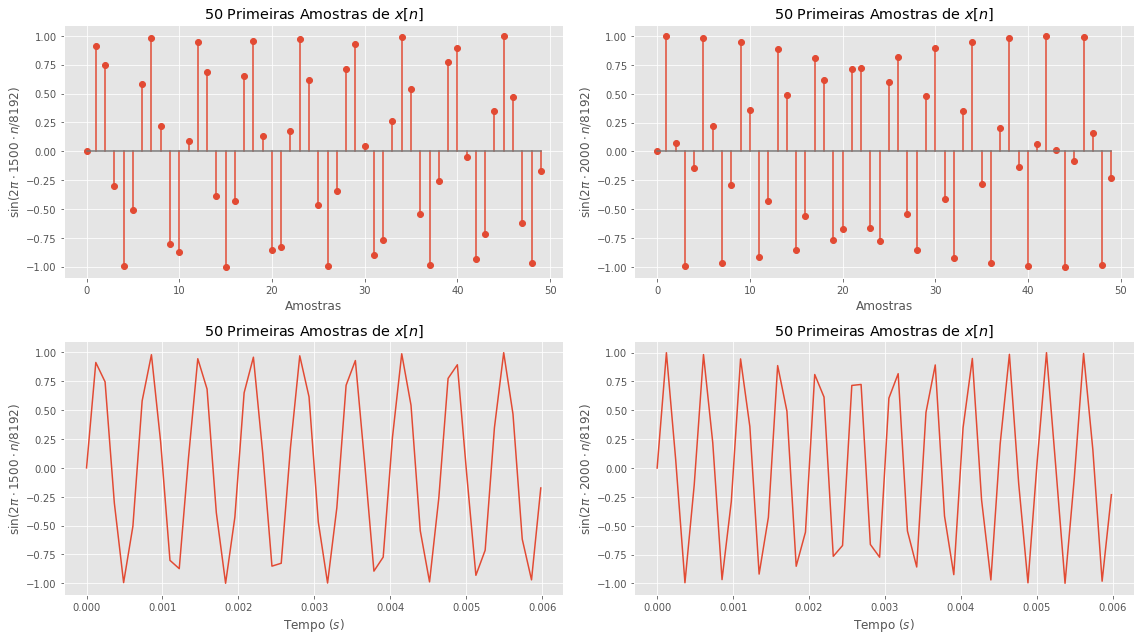

In [15]:
x1 = np.sin(2 * np.pi * 1500 * n/Fs)
x2 = np.sin(2 * np.pi * 2000 * n/Fs)

plt.subplot(221)
plt.xlabel('Amostras')
plt.ylabel('$\sin(2 \pi \cdot 1500 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.stem(n[:50], x1[:50])

plt.subplot(223)
plt.xlabel('Tempo ($s$)')
plt.ylabel('$\sin(2 \pi \cdot 1500 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.plot(t[:50], x1[:50])

plt.subplot(222)
plt.xlabel('Amostras')
plt.ylabel('$\sin(2 \pi \cdot 2000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.stem(n[:50], x2[:50])

plt.subplot(224)
plt.xlabel('Tempo ($s$)')
plt.ylabel('$\sin(2 \pi \cdot 2000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.plot(t[:50], x2[:50])

plt.tight_layout()
plt.show()

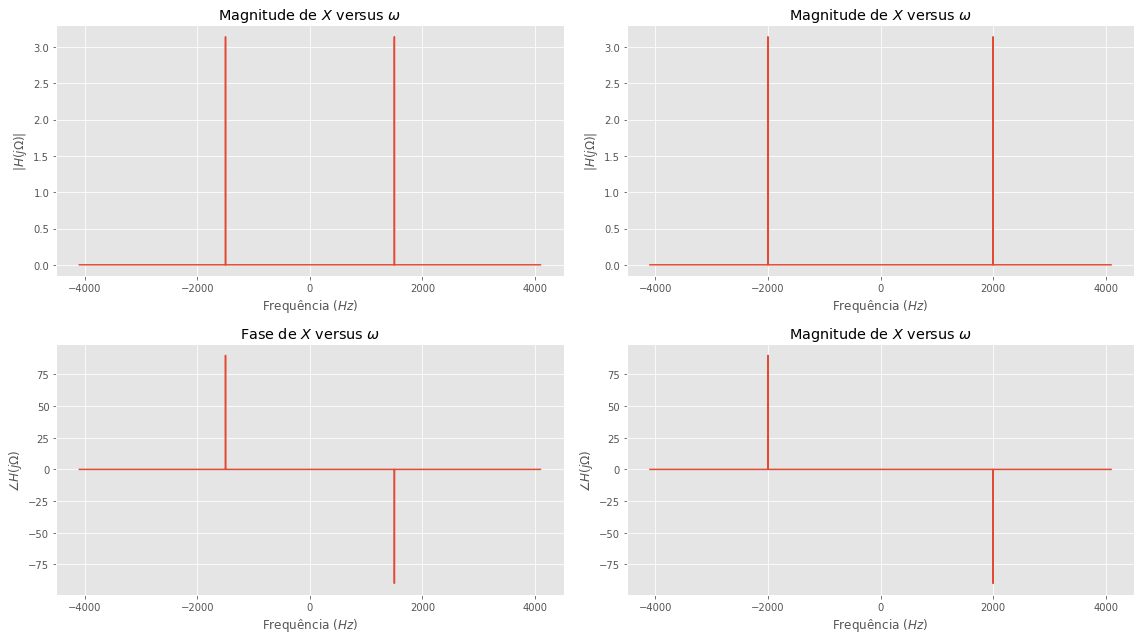

In [17]:
def filter_small_values(arr, epsilon=3e-4):
    arr[np.where(np.abs(arr) < epsilon)] = 0
    return arr


X1, w1 = ctfts(x1, 1 / Fs)
X2, w2 = ctfts(x2, 1 / Fs)

plt.subplot(221)
plt.title('Magnitude de $X$ versus $\omega$')
plt.ylabel('$|H(j\Omega)|$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w1, np.abs(X1))

plt.subplot(223)
plt.title('Fase de $X$ versus $\omega$')
plt.ylabel('$\\angle H(j\Omega)$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w1, np.angle(filter_small_values(X1), deg=True))

plt.subplot(222)
plt.title('Magnitude de $X$ versus $\omega$')
plt.ylabel('$|H(j\Omega)|$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w2, np.abs(X2))

plt.subplot(224)
plt.title('Magnitude de $X$ versus $\omega$')
plt.ylabel('$\\angle H(j\Omega)$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w2, np.angle(filter_small_values(X2), deg=True))

plt.tight_layout()
plt.show()

<span style="color:green">Sim, pois como visto anteriormente, espera-se dois impulsos nas frequências dos tons, $1500 \text{Hz}$ e $2000 \text{Hz}$ respectivamente, o que é confirmado nos gráficos. Já a fase apresenta valor de $\pm \frac{\pi}{2}$ nas frequências do tom, assumindo valor negativo na frequência negativa devido ao termo $-j$ e valor positivo devido ao termo $j$ que multiplica os impulsos. </span>

c) Escute  cada  um  dos  sinais  amostrados  criados  na  parte  (d)  usando sound(x,  1/T).  A afinação  (pitch)  do  tom  que  você  ouve  aumenta  com  a  frequência $\Omega_0$?  Experimente livremente.  Note  que,  como  acontece  com  a  função plot,  a  função sound também implementa uma interpolação. Em resumo, seu micro converte o sinal de tempo discreto do MatLab em um sinal de tempo contínuo por meio de um conversor D/A e então reproduz o sinal contínuo no auto-falante.

In [18]:
print('1,0kHz Tone')
ipd.display(ipd.Audio(x, rate=Fs))
print()

print('1,5kHz Tone')
ipd.display(ipd.Audio(x1, rate=Fs))
print()

print('2,0kHz Tone')
ipd.display(ipd.Audio(x2, rate=Fs))
print()

1,0kHz Tone



1,5kHz Tone



2,0kHz Tone


<span style="color:green">Sim, percebe-se que o som vai ficando mais agudo a medida que a frequência aumenta. É ainda interessante o fato que a partir do uso de um afinador é possível a identificação das notas musicais próximas que estão sendo tocadas, que são:
        <br />
    <br />
    $C_6$: $1000 \text{Hz}$
    <br />
    $F^{\#}_{6} / G^{b}_{6}$: $1500 \text{Hz}$
    <br />
    $B_6$: $2000 \text{Hz}$ 
</span>

f) Agora   repita   as   partes   (a)-(c)   para   as   frequências $\Omega_0 = 2\pi(3500)$, $\Omega_0 = 2\pi(4000)$,
$\Omega_0 = 2\pi(4500)$, $\Omega_0 = 2\pi(5000)$ e $\Omega_0 = 2\pi(5500)$
rad/seg.   Escute   cada   um   dos   sinais amostrados  usando sound.  O  que  você  observa  em  relação  à  afinação  nesses  casos? Explique.

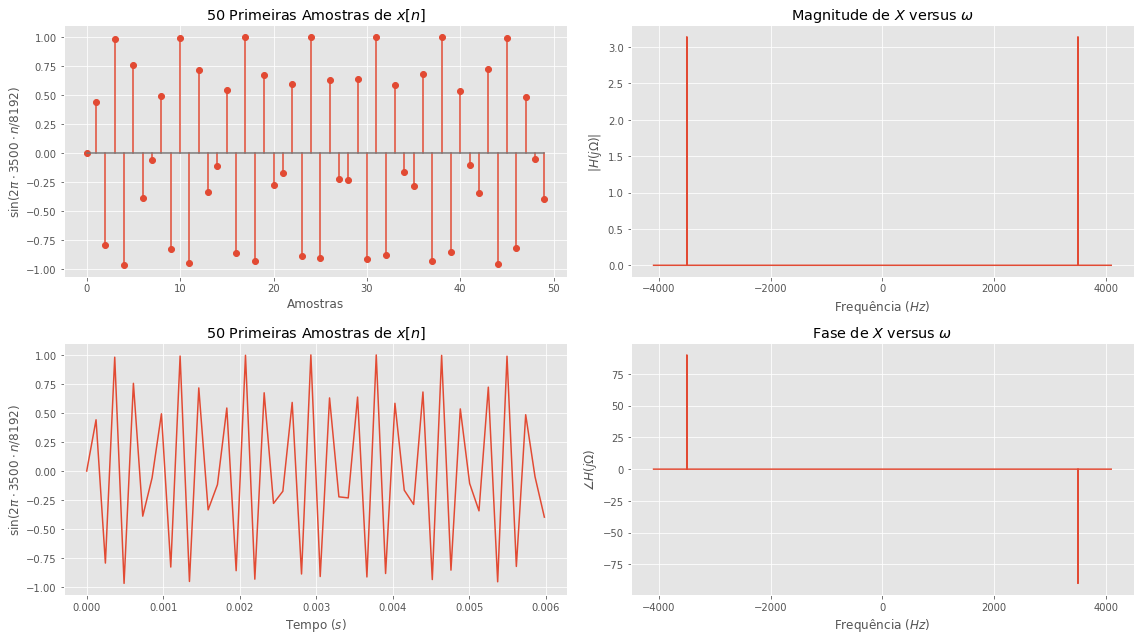

3500Hz Tone


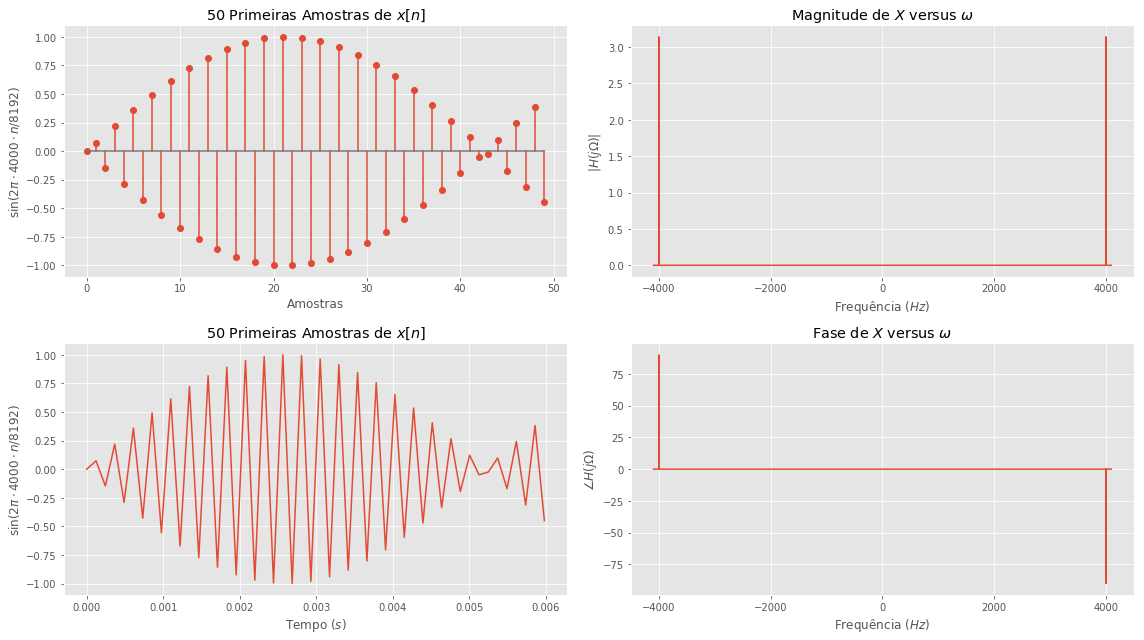

4000Hz Tone


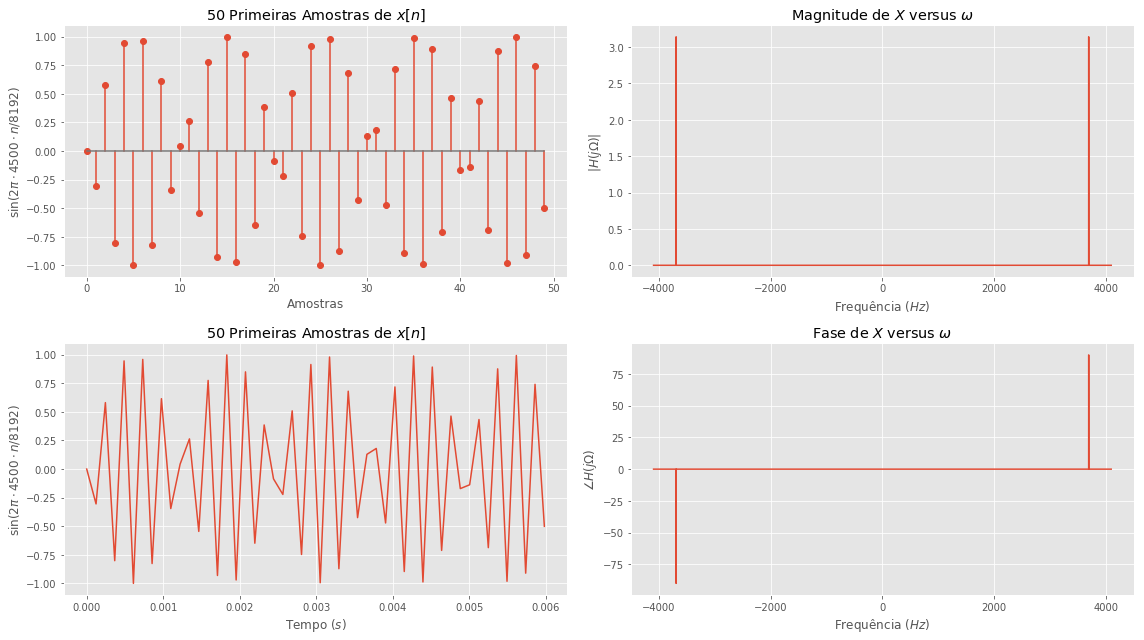

4500Hz Tone


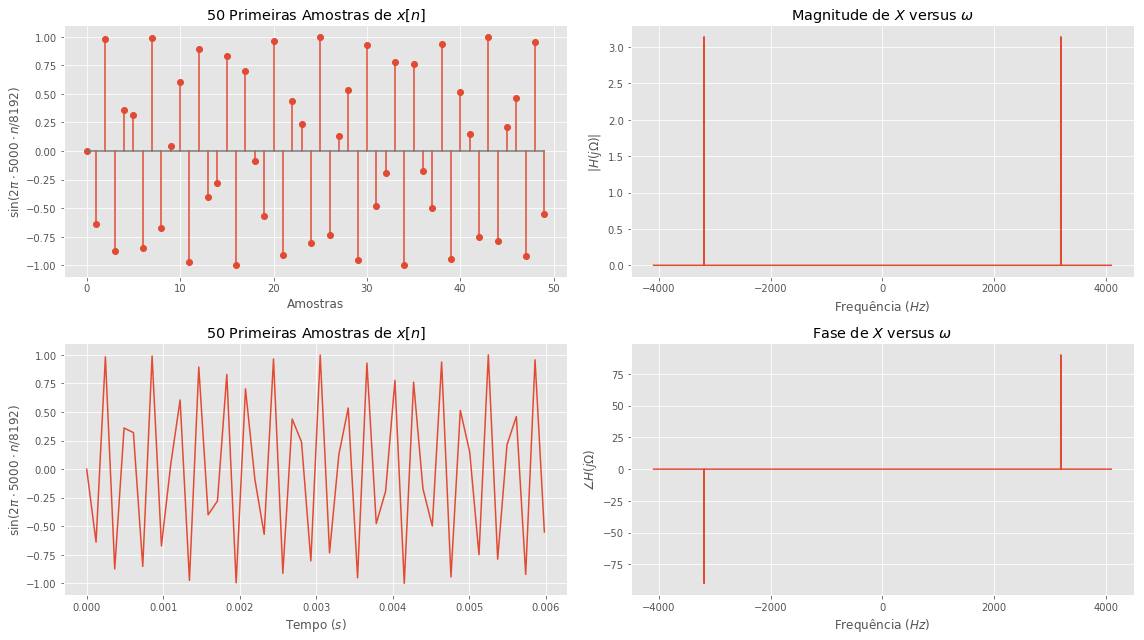

5000Hz Tone


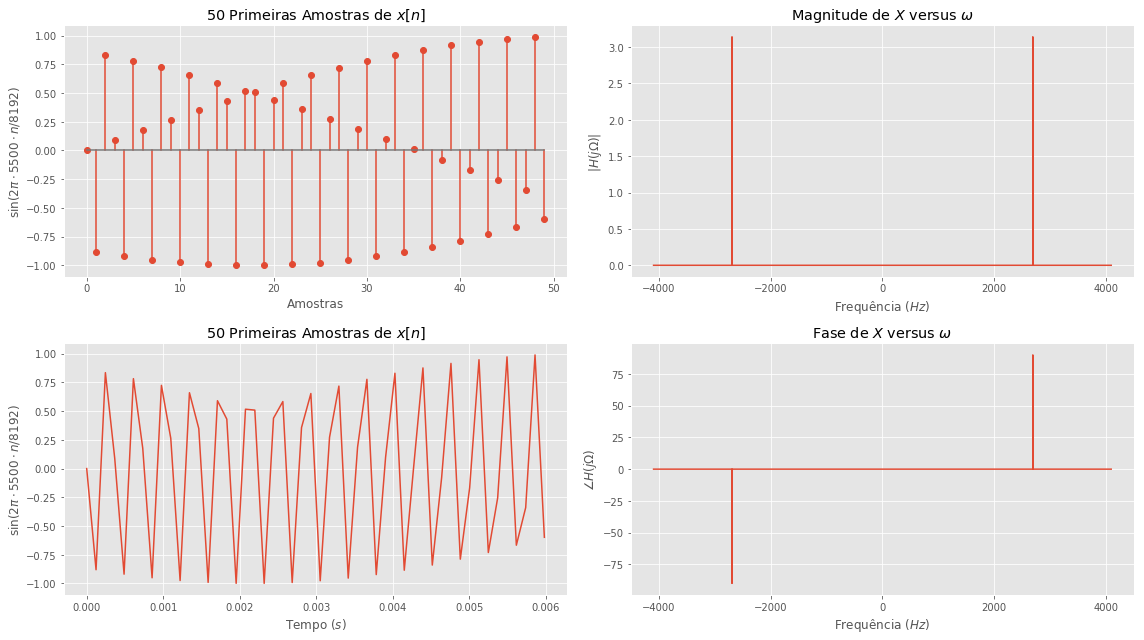

5500Hz Tone


In [19]:
def plot_graphs_for_freq(freq):
    x = np.sin(2 * np.pi * freq * n/Fs)
    
    plt.subplot(221)
    plt.xlabel('Amostras')
    plt.ylabel(f'$\sin(2 \pi \cdot {freq} \cdot n/8192)$')
    plt.title('50 Primeiras Amostras de $x[n]$')
    plt.stem(n[:50], x[:50])
    
    plt.subplot(223)
    plt.xlabel('Tempo ($s$)')
    plt.ylabel(f'$\sin(2 \pi \cdot {freq} \cdot n/8192)$')
    plt.title('50 Primeiras Amostras de $x[n]$')
    plt.plot(t[:50], x[:50])
    
    X, w = ctfts(x, 1/Fs)
    plt.subplot(222)
    plt.title('Magnitude de $X$ versus $\omega$')
    plt.ylabel('$|H(j\Omega)|$')
    plt.xlabel('Frequência ($Hz$)')
    plt.plot(w, np.abs(X))
    
    plt.subplot(224)
    plt.title('Fase de $X$ versus $\omega$')
    plt.ylabel('$\\angle H(j\Omega)$')
    plt.xlabel('Frequência ($Hz$)')
    plt.plot(w, np.angle(filter_small_values(X), deg=True))
    
    plt.tight_layout()
    plt.show()
    
    print(f'{freq}Hz Tone')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    
for freq in range(3500, 6000, 500):
    ipd.display(ipd.HTML(f'<center><h3>f = {freq}Hz</h3></center>'))
    plot_graphs_for_freq(freq)
    print()

<span style="color:green">Para as frequências $f = 3500 \text{Hz}$ e $f = 4000 \text{Hz}$ percebe-se que os tons tornam-se ainda mais agudos. Nas frequências seguintes, porém, os tons voltam a tornar-se mais graves devido ao aliasing.
</span>

<span style="color:green">Aliasing é o fenômeno de sobreposição do sinal no dominio da frequência. Ou seja, ocorre quando duas réplicads do sinal se cruzam na frequência de modo que não é possível recuperar o sinal original. Esse fenômeno acontece quando o teorema de Nyquist para amostragem de sinais não é satisfeito. O teorema de Nyquist diz que $\Omega_s >= 2 \Omega_N$ onde $\Omega_s$ é a frequência em que o sinal é amostrado e $\Omega_N$ é a frquência de Nyquist. 
</span>

<span style="color:green"> Os sinais analisados tinham uma frequência de Nyquist $\Omega_N = \Omega_0$ e $\Omega_s = 2\pi (8192)$.
</span>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-gte5{color:#009901;border-color:#ffffff;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-gte5">$\Omega_N$<br></th>
    <th class="tg-gte5">$\Omega_S$<br></th>
    <th class="tg-gte5">Aliasing</th>
  </tr>
  <tr>
    <td class="tg-gte5">$2\pi(3500)$<br></td>
    <td class="tg-gte5">$2\pi(8192)$<br></td>
    <td class="tg-gte5">Não<br></td>
  </tr>
  <tr>
    <td class="tg-gte5">$2\pi(4000)$</td>
    <td class="tg-gte5">$2\pi(8192)$</td>
    <td class="tg-gte5">Não<br></td>
  </tr>
  <tr>
    <td class="tg-gte5">$2\pi(4500)$</td>
    <td class="tg-gte5">$2\pi(8192)$</td>
    <td class="tg-gte5">Sim<br></td>
  </tr>
  <tr>
    <td class="tg-gte5">$2\pi(5000)$</td>
    <td class="tg-gte5">$2\pi(8192)$</td>
    <td class="tg-gte5">Sim</td>
  </tr>
  <tr>
    <td class="tg-gte5">$2\pi(5500)$</td>
    <td class="tg-gte5">$2\pi(8192)$</td>
    <td class="tg-gte5">Sim</td>
  </tr>
</table>

## Parte 3: Problemas Avançados

Agora considere o sinal chirp:

$x(t) = sin(\Omega_0 t + \frac{1}{2} \beta t^2)$

cuja frequência instantânea $\Omega_i(t)$ aumenta com o tempo, 

$\Omega_i(t) = \frac{d}{dt}(\Omega_0t + \frac{1}{2} \beta t^2) = \Omega_0 + \beta t$

Para os itens (g)-(j) considere que $\Omega_s = 2\pi(8192)$ rad/seg.

g) Considere $\Omega_0 = 2\pi(3000)$ rad/seg e $\beta = 2000$ rad/seg². Armazene no vetor x as amostras do chirp no intervalo $0 <= t <= 1$.

In [20]:
Fs = 8192
omega_s = Fs * 2 * np.pi

omega_o = 3000 * 2 * np.pi 
b = 2000

n = np.array(range(Fs))
t = n / Fs

x = np.sin(omega_o * t + b/2 * (t**2))

h) Use sound para ouvir o chirp contido em x. Você pode explicar o que escutou?

In [21]:
print(f'Chirp')
ipd.display(ipd.Audio(x, rate=Fs))
print()

Chirp


<span style="color:green"> Escuta-se um áudio crescentemente agudo, o que mostra que a frequência do sinal está sendo aumentada. </span>


i) Determine a amostra temporal em que o chirp tem frequência máxima. Dada a equação linear da frequência instantânea e o seu conhecimento sobre o efeito de aliasing, explique como você poderia ter previsto esse valor.

<span style="color:green"> A maior frequência será quando $\Omega_i(t) = \frac{\Omega_S}{2}$, que é a maior frequência possível de ser representada pelo sinal amostrado. Resolvendo a equação dada, obtém-se que a frequência máxima é atingida pela primeira vez no instante de tempo de aproximadamente $3.5$ segundos, como pode ser visto no espectrograma abaixo. Generalizando: a maior frequência será dada quando $\omega_i(t) = k\pi$, sendo $k$ um número ímpar. Desta forma: $t = \frac{k\pi - 2.3}{0.244}$ para k ímpar.
</span>

<span style="color:green"> Este valor poderia ser previsto sabendo que com o aumento linear da frequência, em algum instante de tempo esta atingiria um valor que não estaria de acordo com o teorema de Nyquist. Desta forma, ocorrendo aliasing e distorcendo o sinal, que apresentaria baixas frequências. </span>

j) Armazene no vetor x as amostras dos primeiros 10 segundos do chirp. Escute o sinal usando sound. Explique  como você poderia ter previsto os instantes nos quais o sinal tem frequência nula ou muito baixa.

In [22]:
n = np.array(range(10 * Fs))
t = n / Fs

x = np.sin(omega_o * t + b/2 * (t ** 2))

print(f'10s Chirp')
ipd.display(ipd.Audio(x, rate=Fs))
print()

10s Chirp


<span style="color:green"> Similarmente a questão anterior, o sinal apresenta frequência nula quando sua frequência instânea é zero ou multipla par de  $\pi$. Desta forma, a frequência é nula para $t = \frac{k\pi - 2.3}{0.244}$ em que k é um inteiro par. O resultado pode ser confirmado no espectograma abaixo.
</span>

<span style="color:green"> 
</span>

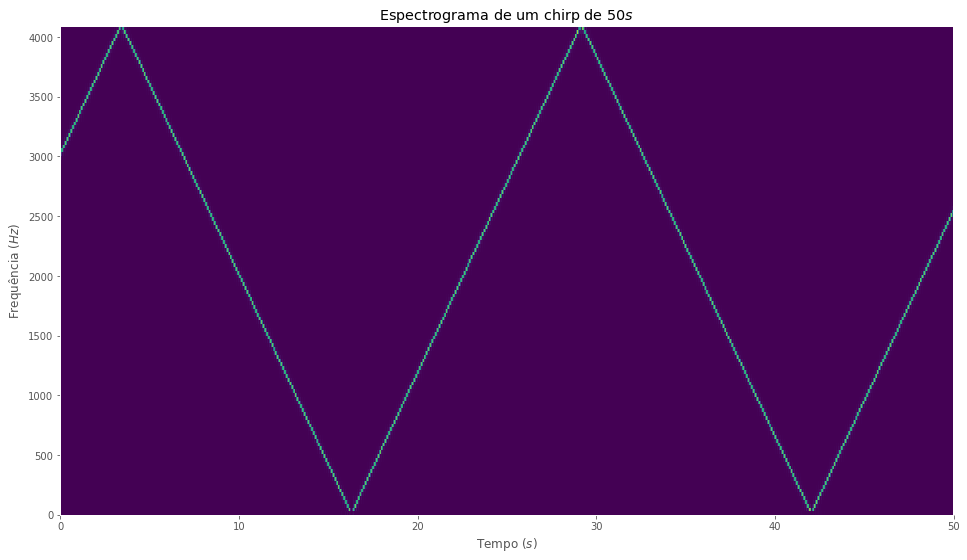

In [23]:
from scipy import signal
n = np.array(range(50 * Fs))
t = n / Fs

x = np.sin(omega_o * t + b/2 * (t ** 2))

f, t, Sxx = signal.spectrogram(x, Fs)
plt.pcolormesh(t, f, Sxx)
plt.title('Espectrograma de um chirp de $50s$')
plt.ylabel('Frequência ($Hz$)')
plt.xlabel('Tempo ($s$)')
plt.show()